<a href="https://colab.research.google.com/github/MoochiPark/keras/blob/master/part02/src/part02_ch03_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 213us/step - loss: 2.2808 - accuracy: 0.1357 - val_loss: 2.2726 - val_accuracy: 0.1467
Epoch 2/1000
700/700 [==============================] - 0s 158us/step - loss: 2.2393 - accuracy: 0.1614 - val_loss: 2.2425 - val_accuracy: 0.1600
Epoch 3/1000
700/700 [==============================] - 0s 148us/step - loss: 2.2067 - accuracy: 0.1657 - val_loss: 2.2146 - val_accuracy: 0.1767
Epoch 4/1000
700/700 [==============================] - 0s 163us/step - loss: 2.1780 - accuracy: 0.1786 - val_loss: 2.1897 - val_accuracy: 0.1833
Epoch 5/1000
700/700 [==============================] - 0s 164us/step - loss: 2.1530 - accuracy: 0.1829 - val_loss: 2.1676 - val_accuracy: 0.1800
Epoch 6/1000
700/700 [==============================] - 0s 167us/step - loss: 2.1292 - accuracy: 0.1871 - val_loss: 2.1507 - val_accuracy: 0.1700
Epoch 7/1000
700/700 [==============================] - 0s 166us/step - loss: 

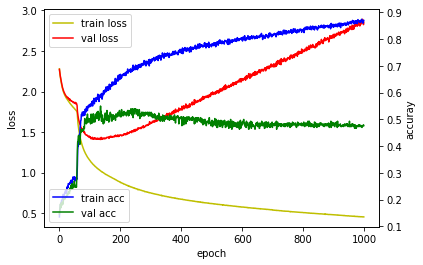

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 116us/step - loss: 1.1215 - accuracy: 0.7210 - val_loss: 0.6480 - val_accuracy: 0.8374
Epoch 2/5
18000/18000 [==============================] - 2s 103us/step - loss: 0.5147 - accuracy: 0.8671 - val_loss: 0.4763 - val_accuracy: 0.8729
Epoch 3/5
18000/18000 [==============================] - 2s 103us/step - loss: 0.4134 - accuracy: 0.8863 - val_loss: 0.4166 - val_accuracy: 0.8840
Epoch 4/5
18000/18000 [==============================] - 2s 103us/step - loss: 0.3672 - accuracy: 0.8971 - val_loss: 0.3790 - val_accuracy: 0.8944
Epoch 5/5
10000/10000 [==============================] - 0s 20us/step

loss_and_metrics : [0.3348161255419254, 0.9067000150680542]
True : 0, Predict : 0
True : 8, Predict : 8
True : 4, Predict : 4
True : 8, Predict : 8
True : 2, Predict : 2


In [2]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 107us/step - loss: 1.1583 - accuracy: 0.7094 - val_loss: 0.6550 - val_accuracy: 0.8382
Epoch 2/5
18000/18000 [==============================] - 2s 102us/step - loss: 0.5173 - accuracy: 0.8644 - val_loss: 0.4815 - val_accuracy: 0.8681
Epoch 3/5
18000/18000 [==============================] - 2s 102us/step - loss: 0.4147 - accuracy: 0.8871 - val_loss: 0.4202 - val_accuracy: 0.8831
Epoch 4/5
18000/18000 [==============================] - 2s 103us/step - loss: 0.3693 - accuracy: 0.8969 - val_loss: 0.3839 - val_accuracy: 0.8901
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step

loss_and_metrics : [0.33884999605417254, 0.9045000076293945]


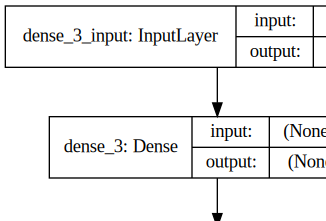

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

# 2. 모델 불러오기
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

# 3. 모델 사용하기
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 1, Predict : 1
True : 2, Predict : 2
True : 8, Predict : 8
True : 9, Predict : 9
True : 4, Predict : 4
